In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("naukri_data_science_jobs_india_cleaned_clusterd.csv", converters={"Skills/Description":pd.eval},index_col=0)

In [3]:
def get_topic_distribution(df, topics_list= None):
    if topics_list is None:
        topics_list = df["lda_topic"].unique()
    num_topics = df["lda_topic"].nunique()
    values = df["lda_topic"].value_counts()
    labels = values.index.tolist()

    x = np.arange(0,8,1)
    fig, ax = plt.subplots()
    bar = ax.bar(x,(values.to_numpy()/len(df))* 100,align= "center")
    ax.set_xticks(x,labels)
    ax.set_ylabel("Precentage")
    ax.bar_label(bar, labels= ["%.1f" % value for value in values.to_list()], fmt="%.1f")
    fig.show()

C:\Users\rfroe\AppData\Local\Temp\ipykernel_22080\1745156556.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


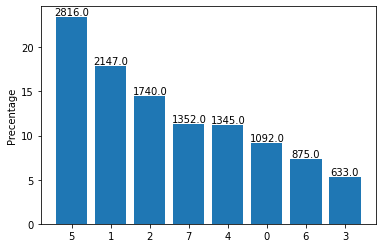

In [193]:
get_topic_distribution(df)

## Genereal Job Roles

In [194]:
tmp = df.drop_duplicates(subset=["Job_Role"])
mask =  ~ tmp["Job_Role"].str.contains(r'(?i)engi(nee?r|nner)|engg')
tmp= tmp[mask]
mask =  ~ tmp["Job_Role"].str.contains(r'(?i)scientist|science')
tmp= tmp[mask]
mask =  ~ tmp["Job_Role"].str.contains(r'(?i)ana?la?y|analytics')
tmp= tmp[mask]
mask =  ~ tmp["Job_Role"].str.contains(r'(?i)big\s*data.*dev')
tmp= tmp[mask]
mask =  ~ tmp["Job_Role"].str.contains(r'(?i)data.*mana|governan')
tmp= tmp[mask]
mask =  ~ tmp["Job_Role"].str.contains(r'(?i)Architect')
tmp= tmp[mask]
mask =  ~ tmp["Job_Role"].str.contains(r'(?i)product')

print(len(tmp[mask]))
tmp[mask].head()

811


C:\Users\rfroe\AppData\Local\Temp\ipykernel_22080\1194076342.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask =  ~ tmp["Job_Role"].str.contains(r'(?i)engi(nee?r|nner)|engg')


,Job_Role,Skills/Description,lda_topic,lda_score
2060,"Program Manager, Global Server Data, Enterpris...","[management, informatica, sap, it_skills, supp...",5,0.494969
2245,"Sr. Spec, Data Mgmt Engr","[computer_science, translation, data_modeling,...",2,0.423467
2425,Associate Consultant - Data Visualization,"[computer_science, front_end, data_modeling, a...",4,0.516159
2596,Snowflake Data Warehouse Application Lead,"[e-learning, metadata, consulting, data_struct...",2,0.663351
2612,Senior Manager Data and AI Delivery,"[supply_chain, computer_science, cloud_computi...",2,0.483579


## We have 10 topics so lets explore each one seperatly to find the bes fitting category 

### Topic 7 

In [276]:
tmp = df[df["lda_topic"]==7]
skills =tmp["Skills/Description"].explode()
skills.value_counts()#.to_string()

spark                     658
python                    482
hadoop                    453
big_data                  452
hive                      368
                         ... 
path_management             1
maintaining_servers         1
data_center_activities      1
vlan_configuration          1
mdm                         1
Name: Skills/Description, Length: 1477, dtype: int64

 we have stuff like hadoop cloud and big data so lets remove these and see what remains

In [201]:
mask = skills.str.contains(r'(?i)cloud|hadoop|azure|spark|aws|hive|kafka|big(\s*|_)data|sqoop|etl')
cloud_total = skills[mask].value_counts().to_numpy().sum()
cloud_diff = len(skills[mask].drop_duplicates())

C:\Users\rfroe\AppData\Local\Temp\ipykernel_22080\2333483432.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = skills.str.contains(r'(?i)cloud|hadoop|azure|spark|aws|hive|kafka|big(\s*|_)data|sqoop|etl')


In [202]:
total = skills.value_counts().to_numpy().sum()
total_unique = len(skills.drop_duplicates())
total

10000

In [203]:
print(cloud_total/total, cloud_diff/total_unique)

0.3862 0.18348002708192282


In [204]:
jobs = tmp["Job_Role"]
jobs.value_counts()

Data Engineer                            126
Big Data Developer                        43
Big Data Engineer                         42
Data Scientist                            38
Senior Data Engineer                      37
                                        ... 
Talend Big Data Application Developer      1
Big Data Developer | Pune                  1
Data Engineer - Pyspark & Scala            1
Lead-Data Engineer                         1
Tech Lead - Azure                          1
Name: Job_Role, Length: 857, dtype: int64

In [209]:
mask = jobs.str.contains(r'(?i)cloud|hadoop|azure|spark|aws|hive|kafka|big(\s*|_)data')
cloud_total = jobs[mask].value_counts().to_numpy().sum()
cloud_diff = len(jobs[mask].drop_duplicates())

C:\Users\rfroe\AppData\Local\Temp\ipykernel_22080\2642771783.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = jobs.str.contains(r'(?i)cloud|hadoop|azure|spark|aws|hive|kafka|big(\s*|_)data')


In [210]:
total = jobs.value_counts().to_numpy().sum()
total_unique = len(jobs.drop_duplicates())
total

1352

In [211]:
print(cloud_total/total, cloud_diff/total_unique)

0.4386094674556213 0.4865810968494749


In [212]:
analyst =jobs[jobs.str.contains(r'(?i)ana?la?y|analytics')]
scientist =jobs[jobs.str.contains(r'(?i)scientist|science')]
engineer =jobs[jobs.str.contains(r'(?i)engi(nee?r|nner)|engg')]
bd =jobs[jobs.str.contains(r'(?i)big\s*data.*dev')]
mgmt =jobs[jobs.str.contains(r'(?i)data.*mana|governan')]
arc =jobs[jobs.str.contains(r'(?i)Architect')]
prod =jobs[jobs.str.contains(r'(?i)product')]
print(len(analyst), len(engineer), len(scientist),len(bd), len(mgmt), len(arc),len(prod))

108 904 79 134 12 39 10


C:\Users\rfroe\AppData\Local\Temp\ipykernel_22080\1947042633.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  engineer =jobs[jobs.str.contains(r'(?i)engi(nee?r|nner)|engg')]


### Call it Big Data for now

# Topic 5

In [ ]:
tmp = df[df["lda_topic"]==6]
skills =tmp["Skills/Description"].explode()
skills.value_counts()#.to_string()

In [ ]:
mask = skills.str.contains(r'(?i)learning|intellig|nlp|natural|modeling|statistics|analy')
cloud_total = skills[mask].value_counts().to_numpy().sum()
cloud_diff = len(skills[mask].drop_duplicates())
total = skills.value_counts().to_numpy().sum()
total_unique = len(skills.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
jobs = tmp["Job_Role"]
jobs.value_counts()

In [ ]:
mask = jobs.str.contains(r'(?i)learning|intellig|nlp|natural|modeling|statistics|analy')
cloud_total = jobs[mask].value_counts().to_numpy().sum()
cloud_diff = len(jobs[mask].drop_duplicates())
total = jobs.value_counts().to_numpy().sum()
total_unique = len(jobs.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
analyst =jobs[jobs.str.contains(r'(?i)ana?la?y|analytics')]
scientist =jobs[jobs.str.contains(r'(?i)scientist|science')]
engineer =jobs[jobs.str.contains(r'(?i)engi(nee?r|nner)|engg')]
bd =jobs[jobs.str.contains(r'(?i)big\s*data.*dev')]
mgmt =jobs[jobs.str.contains(r'(?i)data.*mana|governan')]
arc =jobs[jobs.str.contains(r'(?i)Architect')]
prod =jobs[jobs.str.contains(r'(?i)product')]
print(len(analyst), len(engineer), len(scientist),len(bd), len(mgmt), len(arc),len(prod))

### Call it AI Scientist for now

# Topic 6

In [ ]:
tmp = df[df["lda_topic"]==5]
skills =tmp["Skills/Description"].explode()
skills.value_counts()#.to_string()

In [ ]:
mask = skills.str.contains(r'(?i)risk|business|analy|mang|finan|data')
cloud_total = skills[mask].value_counts().to_numpy().sum()
cloud_diff = len(skills[mask].drop_duplicates())
total = skills.value_counts().to_numpy().sum()
total_unique = len(skills.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
jobs = tmp["Job_Role"]
jobs.value_counts()#.to_string()

In [ ]:
mask = jobs.str.contains(r'(?i)learning|intellig|nlp|natural|modeling|statistics|analy')
cloud_total = jobs[mask].value_counts().to_numpy().sum()
cloud_diff = len(jobs[mask].drop_duplicates())
total = jobs.value_counts().to_numpy().sum()
total_unique = len(jobs.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
analyst =jobs[jobs.str.contains(r'(?i)ana?la?y|analytics')]
scientist =jobs[jobs.str.contains(r'(?i)scientist|science')]
engineer =jobs[jobs.str.contains(r'(?i)engi(nee?r|nner)|engg')]
bd =jobs[jobs.str.contains(r'(?i)big\s*data.*dev')]
mgmt =jobs[jobs.str.contains(r'(?i)data.*mana|governan')]
arc =jobs[jobs.str.contains(r'(?i)Architect')]
prod =jobs[jobs.str.contains(r'(?i)product')]
print(len(analyst), len(engineer), len(scientist),len(bd), len(mgmt), len(arc),len(prod))

## Data Engineer governance product ?

# Topic 4

In [ ]:
tmp = df[df["lda_topic"]==4]
skills =tmp["Skills/Description"].explode()
skills.value_counts()#.to_string()

In [ ]:
mask = skills.str.contains(r'(?i)analy|tableau|visuali|buisness|dashboard|power|intel|data')
cloud_total = skills[mask].value_counts().to_numpy().sum()
cloud_diff = len(skills[mask].drop_duplicates())
total = skills.value_counts().to_numpy().sum()
total_unique = len(skills.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
jobs = tmp["Job_Role"]
jobs.value_counts()#.to_string()

In [ ]:
mask = jobs.str.contains(r'(?i)analy|tableau|visuali|buisness|dashboard|power|intel')
cloud_total = jobs[mask].value_counts().to_numpy().sum()
cloud_diff = len(jobs[mask].drop_duplicates())
total = jobs.value_counts().to_numpy().sum()
total_unique = len(jobs.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
analyst =jobs[jobs.str.contains(r'(?i)ana?la?y|analytics')]
scientist =jobs[jobs.str.contains(r'(?i)scientist|science')]
engineer =jobs[jobs.str.contains(r'(?i)engi(nee?r|nner)|engg')]
bd =jobs[jobs.str.contains(r'(?i)big\s*data.*dev')]
mgmt =jobs[jobs.str.contains(r'(?i)data.*mana|governan')]
arc =jobs[jobs.str.contains(r'(?i)Architect')]
prod =jobs[jobs.str.contains(r'(?i)product')]
print(len(analyst), len(engineer), len(scientist),len(bd), len(mgmt), len(arc),len(prod))

## Buissnes Analyst

# Topic 3

In [ ]:
tmp = df[df["lda_topic"]==3]
skills =tmp["Skills/Description"].explode()
skills.value_counts()#.to_string()

In [ ]:
mask = skills.str.contains(r'(?i)analy|communi|manga|buisness|research|excel|power|presen')
cloud_total = skills[mask].value_counts().to_numpy().sum()
cloud_diff = len(skills[mask].drop_duplicates())
total = skills.value_counts().to_numpy().sum()
total_unique = len(skills.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
jobs = tmp["Job_Role"]
jobs.value_counts()#.to_string()

In [ ]:
mask = jobs.str.contains(r'(?i)analy|communi|manga|buisness|research|excel|power|presen')
cloud_total = jobs[mask].value_counts().to_numpy().sum()
cloud_diff = len(jobs[mask].drop_duplicates())
total = jobs.value_counts().to_numpy().sum()
total_unique = len(jobs.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
analyst =jobs[jobs.str.contains(r'(?i)ana?la?y|analytics')]
scientist =jobs[jobs.str.contains(r'(?i)scientist|science')]
engineer =jobs[jobs.str.contains(r'(?i)engi(nee?r|nner)|engg')]
bd =jobs[jobs.str.contains(r'(?i)big\s*data.*dev')]
mgmt =jobs[jobs.str.contains(r'(?i)data.*mana|governan')]
arc =jobs[jobs.str.contains(r'(?i)Architect')]
prod =jobs[jobs.str.contains(r'(?i)product')]
print(len(analyst), len(engineer), len(scientist),len(bd), len(mgmt), len(arc),len(prod))

## Fin analyst 

# Topic 2

In [ ]:
tmp = df[df["lda_topic"]==2]
skills =tmp["Skills/Description"].explode()
skills.value_counts()#.to_string()

In [ ]:
mask = skills.str.contains(r'(?i)modeling|sql|backend|coding|db|analy|java|python')
cloud_total = skills[mask].value_counts().to_numpy().sum()
cloud_diff = len(skills[mask].drop_duplicates())
total = skills.value_counts().to_numpy().sum()
total_unique = len(skills.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
jobs = tmp["Job_Role"]
jobs.value_counts()#.to_string()

In [ ]:
mask = jobs.str.contains(r'(?i)modeling|sql|backend|coding|db|analy|java|python')
cloud_total = jobs[mask].value_counts().to_numpy().sum()
cloud_diff = len(jobs[mask].drop_duplicates())
total = jobs.value_counts().to_numpy().sum()
total_unique = len(jobs.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
analyst =jobs[jobs.str.contains(r'(?i)ana?la?y|analytics')]
scientist =jobs[jobs.str.contains(r'(?i)scientist|science')]
engineer =jobs[jobs.str.contains(r'(?i)engi(nee?r|nner)|engg')]
bd =jobs[jobs.str.contains(r'(?i)big\s*data.*dev')]
mgmt =jobs[jobs.str.contains(r'(?i)data.*mana|governan')]
arc =jobs[jobs.str.contains(r'(?i)Architect')]
prod =jobs[jobs.str.contains(r'(?i)product')]
print(len(analyst), len(engineer), len(scientist),len(bd), len(mgmt), len(arc),len(prod))

## Misc Engineer

# Topic 1

In [ ]:
tmp = df[df["lda_topic"]==1]
skills =tmp["Skills/Description"].explode()
skills.value_counts()#.to_string()

In [ ]:
mask = skills.str.contains(r'(?i)cloud|oracle|analy|hadoop|modeling|sql|learning|data')
cloud_total = skills[mask].value_counts().to_numpy().sum()
cloud_diff = len(skills[mask].drop_duplicates())
total = skills.value_counts().to_numpy().sum()
total_unique = len(skills.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
jobs = tmp["Job_Role"]
jobs.value_counts()#.to_string()

In [ ]:
mask = jobs.str.contains(r'(?i)cloud|oracle|analy|hadoop|modeling|sql|learning|data')
cloud_total = jobs[mask].value_counts().to_numpy().sum()
cloud_diff = len(jobs[mask].drop_duplicates())
total = jobs.value_counts().to_numpy().sum()
total_unique = len(jobs.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
analyst =jobs[jobs.str.contains(r'(?i)ana?la?y|analytics')]
scientist =jobs[jobs.str.contains(r'(?i)scientist|science')]
engineer =jobs[jobs.str.contains(r'(?i)engi(nee?r|nner)|engg')]
bd =jobs[jobs.str.contains(r'(?i)big\s*data.*dev')]
mgmt =jobs[jobs.str.contains(r'(?i)data.*mana|governan')]
arc =jobs[jobs.str.contains(r'(?i)Architect')]
prod =jobs[jobs.str.contains(r'(?i)product')]
print(len(analyst), len(engineer), len(scientist),len(bd), len(mgmt), len(arc),len(prod))

In [ ]:
## Big Data Misc

In [ ]:
# Topic 0

In [ ]:
tmp = df[df["lda_topic"]==0]
skills =tmp["Skills/Description"].explode()
skills.value_counts()#.to_string()

In [ ]:
mask = skills.str.contains(r'(?i)sql|modeling|azure|pandas|modeling|db|manage|data')
cloud_total = skills[mask].value_counts().to_numpy().sum()
cloud_diff = len(skills[mask].drop_duplicates())
total = skills.value_counts().to_numpy().sum()
total_unique = len(skills.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
jobs = tmp["Job_Role"]
jobs.value_counts()#.to_string()

In [ ]:
mask = jobs.str.contains(r'(?i)sql|modeling|azure|pandas|modeling|db|manage')
cloud_total = jobs[mask].value_counts().to_numpy().sum()
cloud_diff = len(jobs[mask].drop_duplicates())
total = jobs.value_counts().to_numpy().sum()
total_unique = len(jobs.drop_duplicates())
print(cloud_total/total, cloud_diff/total_unique)

In [ ]:
analyst =jobs[jobs.str.contains(r'(?i)ana?la?y|analytics')]
scientist =jobs[jobs.str.contains(r'(?i)scientist|science')]
engineer =jobs[jobs.str.contains(r'(?i)engi(nee?r|nner)|engg')]
bd =jobs[jobs.str.contains(r'(?i)big\s*data.*dev')]
mgmt =jobs[jobs.str.contains(r'(?i)data.*mana|governan')]
arc =jobs[jobs.str.contains(r'(?i)Architect')]
prod =jobs[jobs.str.contains(r'(?i)product')]
print(len(analyst), len(engineer), len(scientist),len(bd), len(mgmt), len(arc),len(prod))

## Data Engineer

In [ ]:
def helper(x):
    return len(x)

In [ ]:
df["len"] = df["Skills/Description"].apply(lambda x:helper(x) )
print(df["len"].min(),df["len"].max(),df["len"].value_counts())

In [12]:
def helper(x):
    return len(x)

In [13]:
df["len"] = df["Skills/Description"].apply(lambda x:helper(x) )
print(df["len"].min(),df["len"].max(),df["len"].value_counts())

1 9 8    10307
7      402
6      366
5      274
4      218
3      180
1      128
2      124
9        1
Name: len, dtype: int64
